<a href="https://colab.research.google.com/github/TNH510/Artificial-Intelligence/blob/main/Con_lac_nguoc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Điều khiển con lắc ngược tự cân bằng bằng fuzzy logic

In [ ]:
pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 32.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=8d93ecfdaf4fa2b6122eb2310cb85d5dc1fef9de6a67a0d53c18cd9cccacb00d
  Stored in directory: /root/.cache/pip/wheels/2c/04/80/7eefb1a2de7d36aefd06432fab2a1486caf0a0596a7067391a
Successfully built scikit-fuzzy


In [19]:
import numpy as np
import skfuzzy as fuzzy
from skfuzzy import control as ctrl

In [20]:
universe = np.linspace(-90,90,61) 
universe1 = np.linspace(-45,45,61)
universe2 = np.linspace(-100,100,61)
alpha = ctrl.Antecedent(universe, 'alpha')
d_alpha = ctrl.Antecedent(universe1, 'd_alpha')
f = ctrl.Consequent(universe2, 'f')

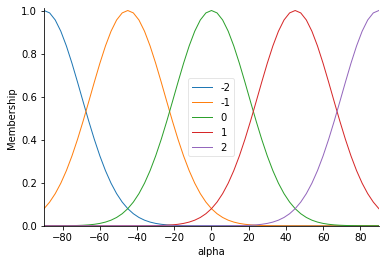

In [21]:
alpha['-2'] = fuzzy.gaussmf(alpha.universe,-90,20)
alpha['-1'] = fuzzy.gaussmf(alpha.universe,-45,20)
alpha['0'] = fuzzy.gaussmf(alpha.universe,0,20)
alpha['1'] = fuzzy.gaussmf(alpha.universe,45,20)
alpha['2'] = fuzzy.gaussmf(alpha.universe,90,20)
alpha.view()

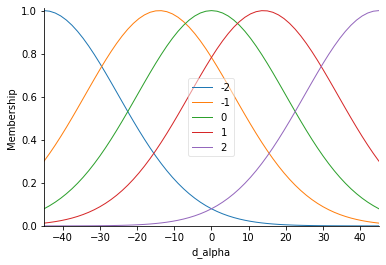

In [22]:
d_alpha['-2'] = fuzzy.gaussmf(d_alpha.universe,-45,20)
d_alpha['-1'] = fuzzy.gaussmf(d_alpha.universe,-14,20)
d_alpha['0'] = fuzzy.gaussmf(d_alpha.universe,0,20)
d_alpha['1'] = fuzzy.gaussmf(d_alpha.universe,14,20)
d_alpha['2'] = fuzzy.gaussmf(d_alpha.universe,45,20)
d_alpha.view()

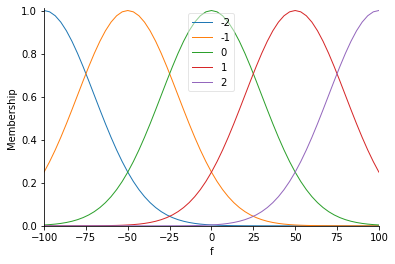

In [23]:
f['-2'] = fuzzy.gaussmf(f.universe,-100,30)
f['-1'] = fuzzy.gaussmf(f.universe,-50,30)
f['0'] = fuzzy.gaussmf(f.universe,0,30)
f['1'] = fuzzy.gaussmf(f.universe,50,30)
f['2'] = fuzzy.gaussmf(f.universe,100,30)
f.view()

In [24]:
#Rule
rule0 = ctrl.Rule(antecedent=((alpha['-2']&d_alpha['-2'])|(alpha['-1']&d_alpha['-2'])|(alpha['-2']&d_alpha['-1'])), consequent= f['-2'])
rule1 = ctrl.Rule(antecedent=((alpha['-1']&d_alpha['-1'])|(alpha['0']&d_alpha['-2'])|(alpha['-1']&d_alpha['0'])|
                              (alpha['0']&d_alpha['-1'])|(alpha['-2']&d_alpha['0'])|(alpha['-2']&d_alpha['1'])|
                              (alpha['1']&d_alpha['-2'])), consequent= f['-1'])
rule2 = ctrl.Rule(antecedent=((alpha['-2']&d_alpha['2'])|(alpha['-1']&d_alpha['1'])|(alpha['0']&d_alpha['0'])|
                              (alpha['1']&d_alpha['-1'])|(alpha['2']&d_alpha['-2'])), consequent= f['0'])
rule3 = ctrl.Rule(antecedent=((alpha['1']&d_alpha['1'])|(alpha['0']&d_alpha['2'])|(alpha['2']&d_alpha['0'])|
                              (alpha['2']&d_alpha['-1'])|(alpha['-1']&d_alpha['2'])|(alpha['1']&d_alpha['0'])|
                              (alpha['0']&d_alpha['1'])), consequent= f['1'])
rule4 = ctrl.Rule(antecedent=((alpha['2']&d_alpha['2'])|(alpha['1']&d_alpha['2'])|(alpha['2']&d_alpha['1'])), consequent= f['2'])

In [25]:
from matplotlib.legend import time
import matplotlib
from skfuzzy.control.controlsystem import ControlSystemSimulation
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

system = ctrl.ControlSystem([rule0, rule1, rule2,rule3,rule4])
sim = ctrl.ControlSystemSimulation(system,flush_after_run= 61*61+1)
upsampled = np.linspace(-90,90,61)
upsampled = np.linspace(-45,45,61)
x,y = np.meshgrid(upsampled,upsampled)
z = np.zeros_like(x)


In [26]:
for i in range(61):
  for j in range(61):
    sim.input['alpha']= x[i,j]
    sim.input['d_alpha']=y[i,j]
    sim.compute()
    z[i,j]=sim.output['f']
    

<ipython-input-31-2c2c59b4d2f8>:4: UserWarning: The following kwargs were not used by contour: 'anpha'
  cset = ax.contourf(x,y,z,zdir='z',offset=6,cmap='viridis',anpha=0.3)
<ipython-input-31-2c2c59b4d2f8>:5: UserWarning: The following kwargs were not used by contour: 'anpha'
  cset = ax.contourf(x,y,z,zdir='x',offset=6,cmap='viridis',anpha=0.3)
<ipython-input-31-2c2c59b4d2f8>:6: UserWarning: The following kwargs were not used by contour: 'anpha'
  cset = ax.contourf(x,y,z,zdir='y',offset=6,cmap='viridis',anpha=0.3)


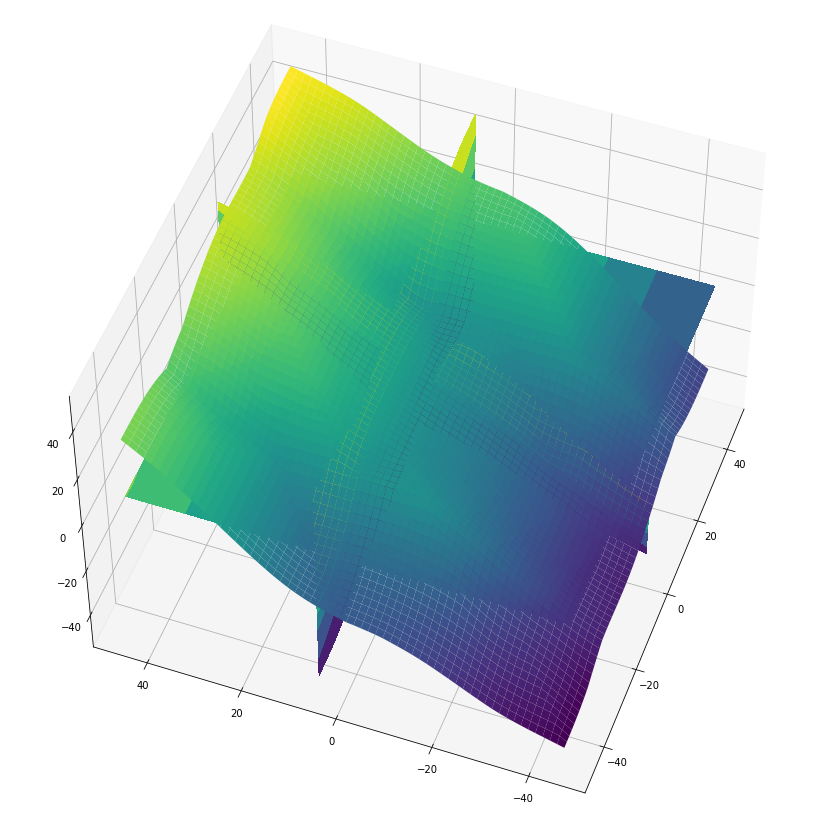

In [31]:
fig = plt.figure(figsize =(15,15))
ax = fig.add_subplot(111,projection = '3d')
suf = ax.plot_surface(x,y,z,rstride=1, cstride=1, cmap='viridis',linewidth = 0.3)
cset = ax.contourf(x,y,z,zdir='z',offset=6,cmap='viridis',anpha=0.3)
cset = ax.contourf(x,y,z,zdir='x',offset=6,cmap='viridis',anpha=0.3)
cset = ax.contourf(x,y,z,zdir='y',offset=6,cmap='viridis',anpha=0.3)
ax.view_init(50,200)